<a href="https://colab.research.google.com/github/shahzarhusain/airbnb_booking_anlysis/blob/main/Airbnb_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the database
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter_datasets/Airbnb NYC 2019.csv')

What can we analyse in this dataset?
1. Which neighbourhood group has the most properties?
2. Room type distribution
3. Least expensive to most expensive property
4. Grouping the properties as per their availability.
5. Try to plot the properties on map using longitude and lattitde data

Basic data exploration

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Data Cleaning

In [6]:
# We can see that few columns has null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Checking the percentage vale of missing data
df.isnull().sum()/len(df)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [8]:
#let's check the columns "last_review" and "reviews_per_month" to decide whether we should drop the null values or fill them 
df["last_review"]

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [9]:
df.groupby("name").count()["last_review"]

name
 1 Bed Apt in Utopic Williamsburg                   1
 2-3 bedroom UWS garden triplex                     1
 3 bedroom loft in Williamsburg                     1
 A charming Space in Brooklyn                       1
 AMAZING TIME SQUARE!!BRICK WALLS!!                 1
                                                   ..
한성 韓城 Han B (2F)                                    1
한성 韓城 Han C (2F)                                    1
️CENTRALLY LOCATED️- Great for Families + Groups    1
ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2                             1
ﾏﾝﾊｯﾀﾝ､駅から徒歩4分でどこに行くのにも便利な場所!女性の方希望,ｷﾚｲなお部屋｡        0
Name: last_review, Length: 47905, dtype: int64

In [18]:
df['last_review'].describe()

count          38843
unique          1764
top       2019-06-23
freq            1413
Name: last_review, dtype: object

In [19]:
df[df['reviews_per_month'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [22]:
# as we can see that 3 columns i.e. number_of_reviews, last_review,	reviews_per_month does not have any values so we will drop the null values
new_df = df.dropna()

In [23]:
new_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Data Exploration

In [40]:
# Which neighbourhood group has the most properties?
new_df['neighbourhood_group'].describe()

count         38821
unique            5
top       Manhattan
freq          16621
Name: neighbourhood_group, dtype: object

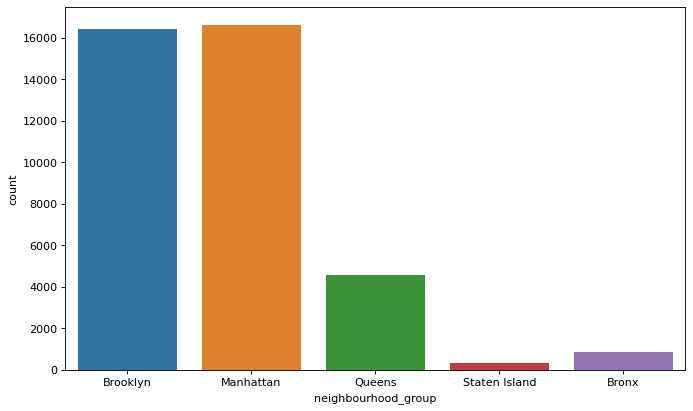

In [41]:
plt.figure(figsize= (10,6), dpi = 80)
sns.countplot(data = new_df, x = "neighbourhood_group")
plt.show()

We can see that Manhattan has the most property listed and Staten island has the least. Let's check the data according to neighbourhood as well.

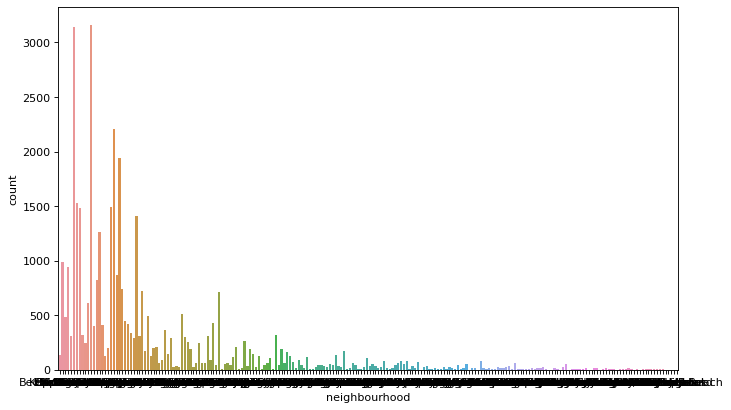

In [42]:
plt.figure(figsize= (10,6), dpi = 80)
sns.countplot(data = new_df, x = "neighbourhood")
plt.show()

In [43]:
new_df['neighbourhood'].describe()

count            38821
unique             218
top       Williamsburg
freq              3163
Name: neighbourhood, dtype: object

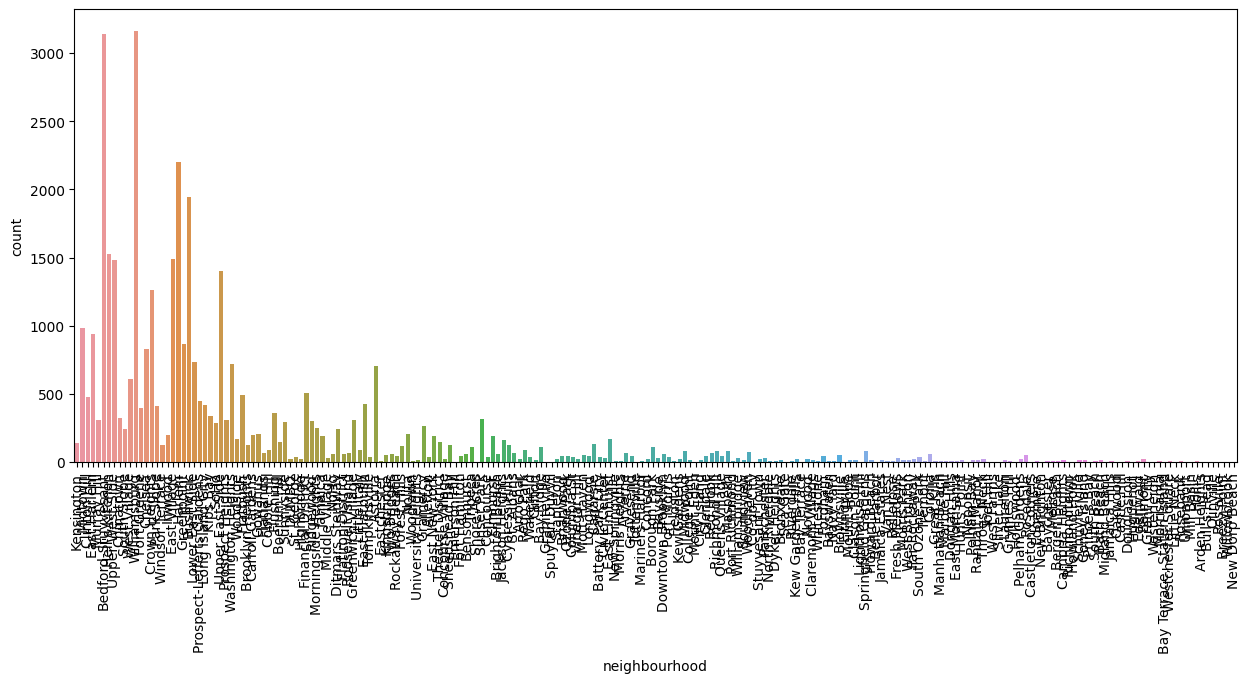

In [44]:
# We can see that there are 218 unique values. That is making our graph a bit complicated to understand
plt.figure(figsize= (15,6), dpi = 100)
sns.countplot(data = new_df, x = "neighbourhood")
plt.xticks(rotation = 90)
plt.show()

In [73]:
#We can see that there are many neighbourhood having very low count of property. Let's eliminate them and then check the data 
new_df.groupby('neighbourhood').count()['id']

neighbourhood
Allerton            37
Arden Heights        4
Arrochar            20
Arverne             66
Astoria            709
                  ... 
Willowbrook          1
Windsor Terrace    128
Woodhaven           72
Woodlawn            11
Woodside           170
Name: id, Length: 218, dtype: int64

neighbourhood
Allerton            37
Arden Heights        4
Arrochar            20
Arverne             66
Astoria            709
                  ... 
Willowbrook          1
Windsor Terrace    128
Woodhaven           72
Woodlawn            11
Woodside           170
Name: id, Length: 218, dtype: int64